<a href="https://colab.research.google.com/github/raymondkl92/wqu_capstone_vxx/blob/main/Capstone_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

from datetime import date
from dateutil.relativedelta import relativedelta

end_date = date(2023,6,5) #or date.today()
start_date = end_date - relativedelta(years=2)

In [ ]:
spy_price = yf.download("SPY", start=start_date, end=end_date).round(1)[['Adj Close']]
vix_price= yf.download("^VIX", start=start_date, end=end_date).round(1)[['Adj Close']]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
spy_price.columns=['SPY']
vix_price.columns=['VIX']

In [ ]:
df=spy_price.join(vix_price)
df

,SPY,VIX
Date,,
2021-06-07,406.8,16.4
2021-06-08,406.9,17.1
2021-06-09,406.3,17.9
2021-06-10,408.2,16.1
2021-06-11,408.9,15.6
...,...,...
2023-05-26,417.0,18.0
2023-05-30,417.2,17.5
2023-05-31,414.8,17.9


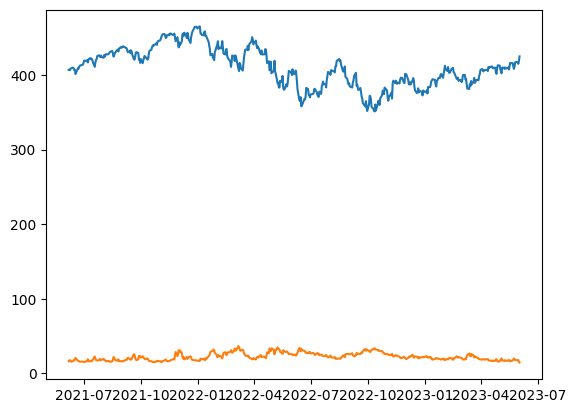

In [ ]:
plt.plot(df)
plt.title('Closing price relationship between SPY and VIX')
plt.show()

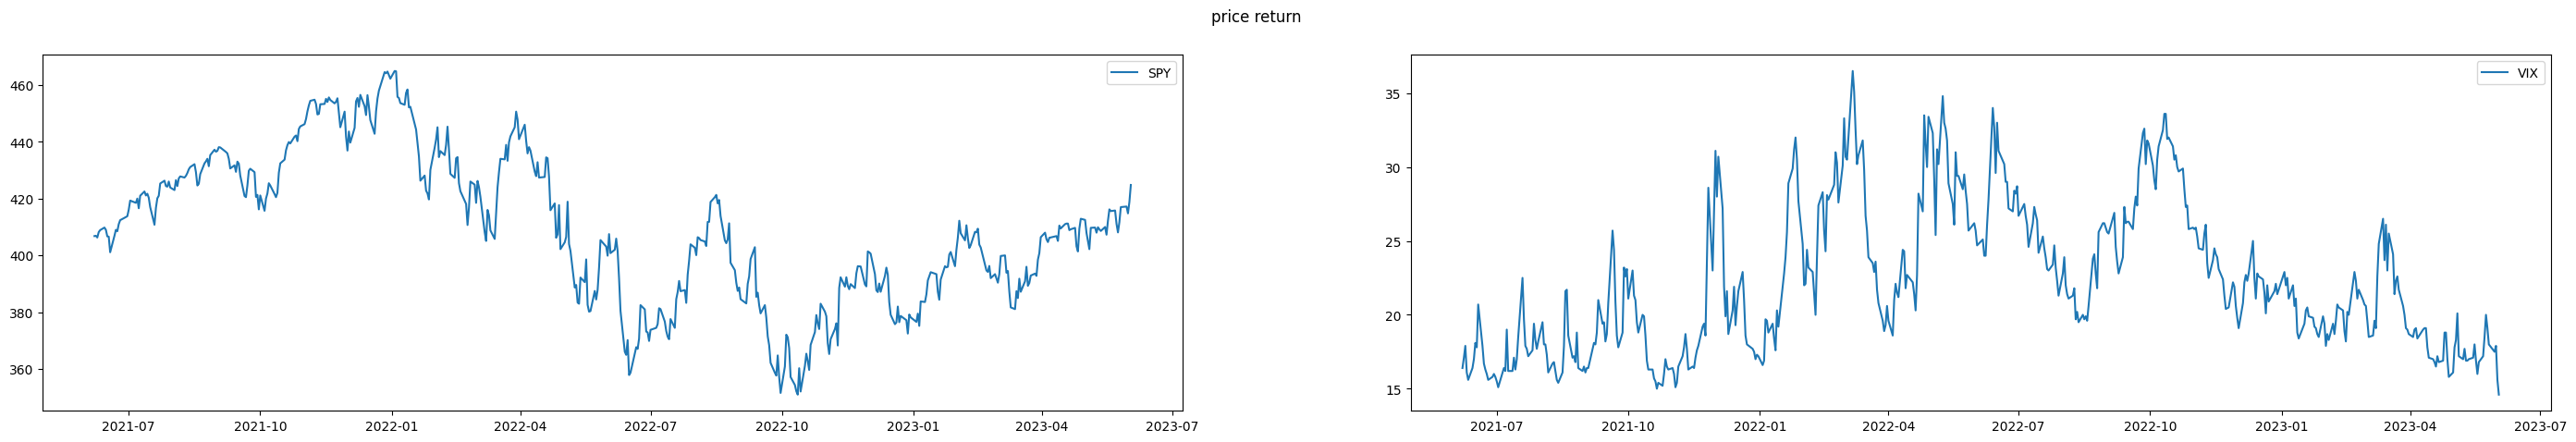

In [ ]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (35,5))
fig.suptitle('price return')
ax1.plot(spy_price, label = 'SPY')
ax2.plot(vix_price, label = 'VIX')
ax1.legend(loc = 'best')
ax2.legend(loc = 'best')

In [ ]:
spy_returns = yf.download("SPY", start=start_date, end=end_date).round(1)[['Adj Close']].pct_change().dropna()
vix_returns= yf.download("^VIX", start=start_date, end=end_date).round(1)[['Adj Close']].pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
spy_returns.columns=['SPY']
vix_returns.columns=['VIX']

In [ ]:
df=spy_returns.join(vix_returns)
df

,SPY,VIX
Date,,
2021-06-08,0.000246,0.042683
2021-06-09,-0.001475,0.046784
2021-06-10,0.004676,-0.100559
2021-06-11,0.001715,-0.031056
2021-06-14,0.002201,0.051282
...,...,...
2023-05-26,0.012873,-0.057592
2023-05-30,0.000480,-0.027778
2023-05-31,-0.005753,0.022857


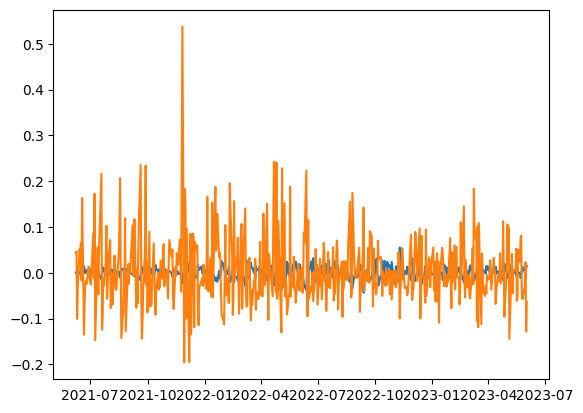

In [ ]:
plt.plot(df)

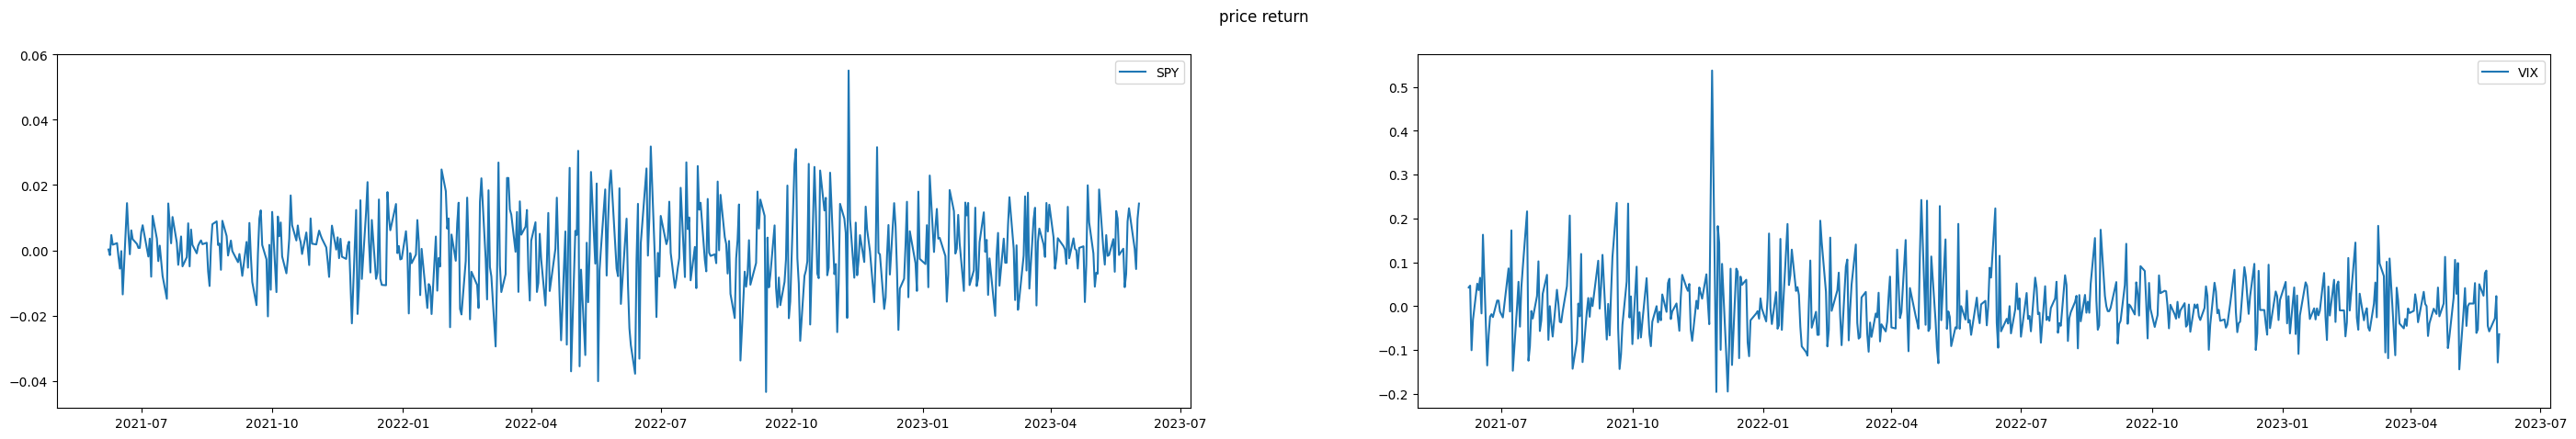

In [ ]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (35,5))
fig.suptitle('price return')
ax1.plot(spy_returns, label = 'SPY')
ax2.plot(vix_returns, label = 'VIX')
ax1.legend(loc = 'best')
ax2.legend(loc = 'best')

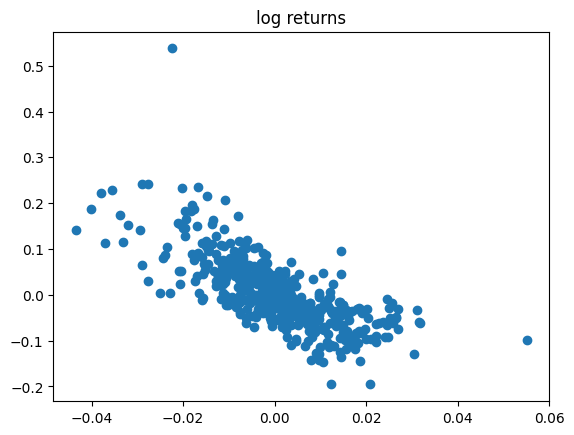

In [ ]:
plt.scatter(spy_returns, vix_returns)
plt.title('log returns')
plt.show()

In [ ]:
import statsmodels.api as sm
model = sm.OLS(spy_returns, vix_returns)
results = model.fit()

print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                    SPY   R-squared (uncentered):                   0.529
Model:                            OLS   Adj. R-squared (uncentered):              0.528
Method:                 Least Squares   F-statistic:                              562.0
Date:                Sun, 19 Nov 2023   Prob (F-statistic):                    7.99e-84
Time:                        08:19:22   Log-Likelihood:                          1678.2
No. Observations:                 501   AIC:                                     -3354.
Df Residuals:                     500   BIC:                                     -3350.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

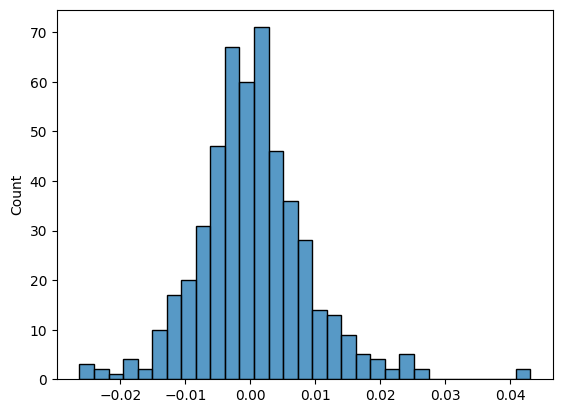

In [ ]:
import seaborn as sns
sns.histplot(results.resid);

Since we found the linear regression between the SPY and the VIX then, we found the hedge ratio which compares the value of the position hedge to the size of the entire position.

In [ ]:
hedge_ratio = results.params[0]
print("Hedge Ratio: ", hedge_ratio)

Hedge Ratio:  -0.12063639847274207


Our hedge ratio was found to be -0.1206, so we assumed our long position size to be $20000 through which we can use to find our short position size as;

In [ ]:
long_position_size = 20000  # value of the long position
short_position_size = -hedge_ratio * long_position_size

print("Long Position Size: ", long_position_size)
print("Short Position Size: ", short_position_size)

Long Position Size:  20000
Short Position Size:  2412.7279694548415


We know found our long as well as short returns which guides us through finding hedge and unhedge returns



In [ ]:
long_returns = spy_returns
short_returns = -hedge_ratio * vix_returns

# Compute the returns of the hedged and unhedged positions
hedged_returns = long_returns + short_returns
unhedged_returns = long_returns

# Compute cumulative returns for the hedged and unhedged positions
hedged_cumulative_returns = (1 + hedged_returns).cumprod() * long_position_size
unhedged_cumulative_returns = (1 + unhedged_returns).cumprod() * long_position_size

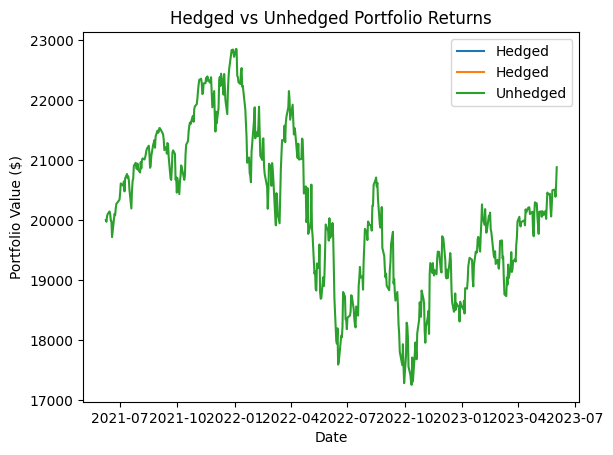

In [ ]:
# Plot the cumulative returns
import matplotlib.pyplot as plt

plt.plot(hedged_cumulative_returns, label="Hedged")
plt.plot(unhedged_cumulative_returns, label="Unhedged")
plt.legend()
plt.title("Hedged vs Unhedged Portfolio Returns")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.show()

Here is the output data gotten such as the mean return, sharp ratio, and standard deviation



In [ ]:
import numpy as np

hedged_returns = hedged_returns.dropna()
unhedged_returns = unhedged_returns.dropna()

hedged_mean = np.mean(hedged_returns)
unhedged_mean = np.mean(unhedged_returns)
hedged_std = np.std(hedged_returns)
unhedged_std = np.std(unhedged_returns)

hedged_sharpe_ratio = hedged_mean / hedged_std * np.sqrt(252)
unhedged_sharpe_ratio = unhedged_mean / unhedged_std * np.sqrt(252)

print("Hedged Mean Return: ", hedged_mean)
print("Unhedged Mean Return: ", unhedged_mean)
print("Hedged Standard Deviation: ", hedged_std)
print("Unhedged Standard Deviation: ", unhedged_std)
print("Hedged Sharpe Ratio: ", hedged_sharpe_ratio)
print("Unhedged Sharpe Ratio: ", unhedged_sharpe_ratio)

Hedged Mean Return:  SPY   NaN
VIX   NaN
dtype: float64
Unhedged Mean Return:  SPY    0.000163
dtype: float64
Hedged Standard Deviation:  SPY   NaN
VIX   NaN
dtype: float64
Unhedged Standard Deviation:  SPY    0.012376
dtype: float64
Hedged Sharpe Ratio:  SPY   NaN
VIX   NaN
dtype: float64
Unhedged Sharpe Ratio:  SPY    0.209163
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Selected S&P 500 equity with VXX. VXX ETF historical data was obtained from investpy.com

In [ ]:
pip install investpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 22.6 MB/s eta 0:00:00
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481567 sha256=c8c743edcb0cc43b7e9f00bb42fd75c776765924ad0e60669592e7629e533dab
  Stored in directory: /root/.cache/pip/wheels/db/f4/ae/980b93b0257620bc8e4afc98a854a7a746a33eb8335fd07906
Successfully built investpy


In [ ]:
import investpy

In [ ]:
date_start= '01/01/2020'
date_end= '23/10/2021'

In [ ]:
VXX = investpy.indices.get_index_historical_data(index="VXX", country= "United States", from_date= date_start, to_date= date_end, as_json=False, order='ascending', interval='Daily')